In [1]:
import json
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np

# Read the JSON file
with open('dataset/parsed_files/!.json') as file:
    data = json.load(file)

In [2]:
def custom_sort_key(step):
    if step == '0000':
        return (0, step)  # All zeroes
    elif step.count('1') == 1 and '2' not in step and '3' not in step and 'M' not in step:
        return (1, step)  # Only one '1'
    elif step.count('1') > 1 and '2' not in step and '3' not in step and 'M' not in step:
        return (2, step)  # Multiple '1's
    elif step.count('2') == 1 and '1' not in step and '3' not in step and 'M' not in step:
        return (3, step)  # Only one '2'
    elif step.count('2') > 1 and '1' not in step and '3' not in step and 'M' not in step:
        return (4, step)  # Multiple '2's
    elif step.count('3') == 1 and '1' not in step and '2' not in step and 'M' not in step:
        return (5, step)  # Only one '3'
    elif step.count('3') > 1 and '1' not in step and '2' not in step and 'M' not in step:
        return (6, step)  # Multiple '3's
    elif 'M' not in step:
        return (7, step)  # Steps without letters
    else:
        return (8, step)

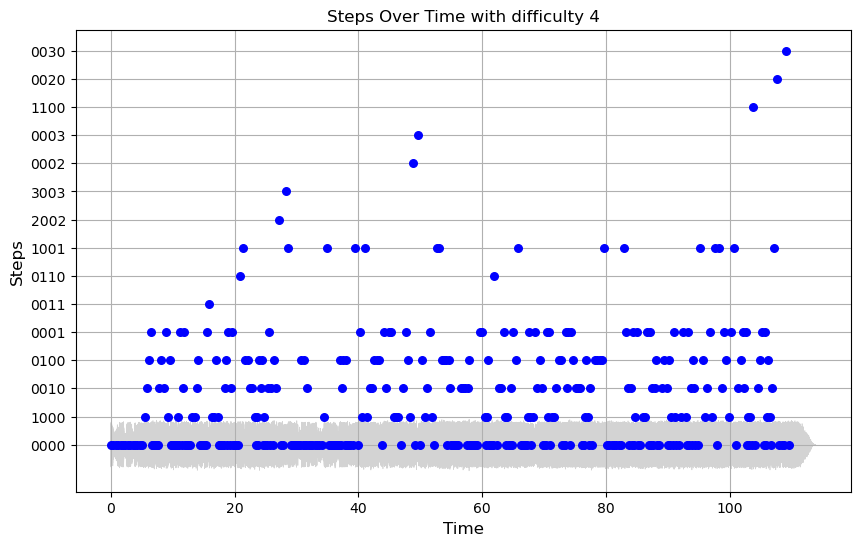

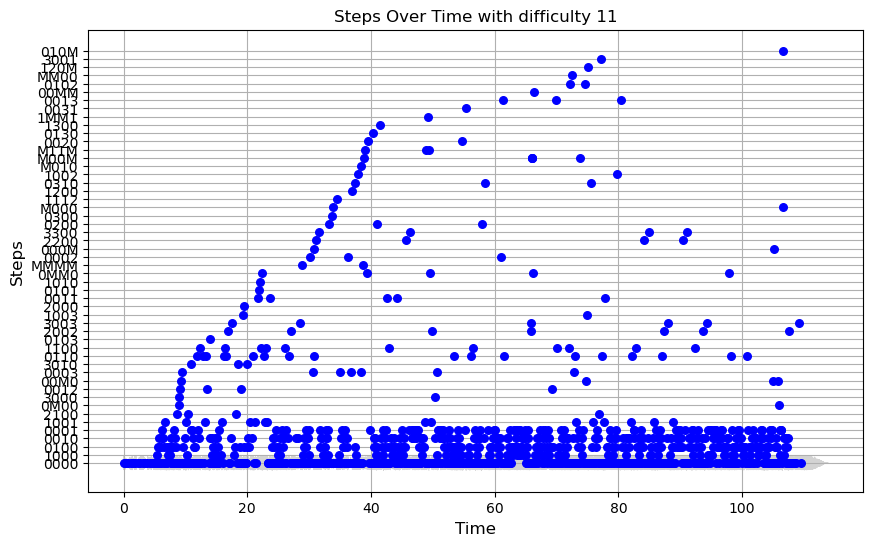

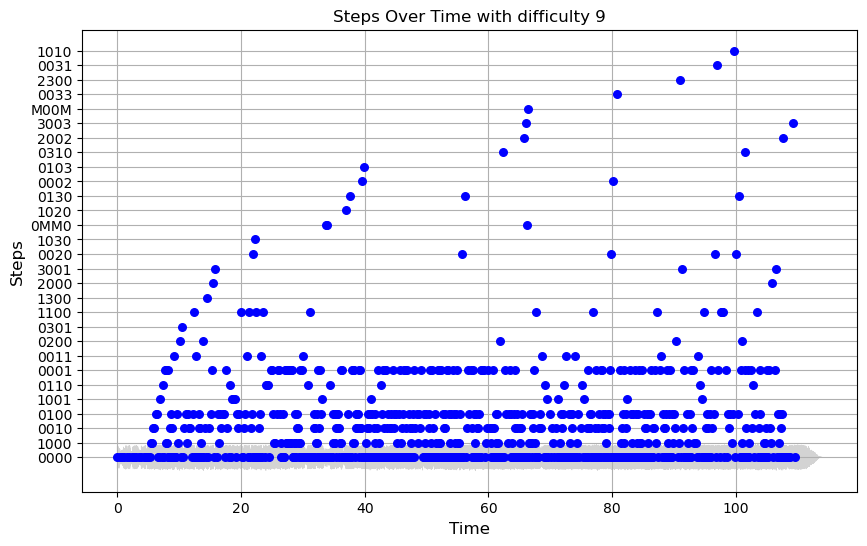

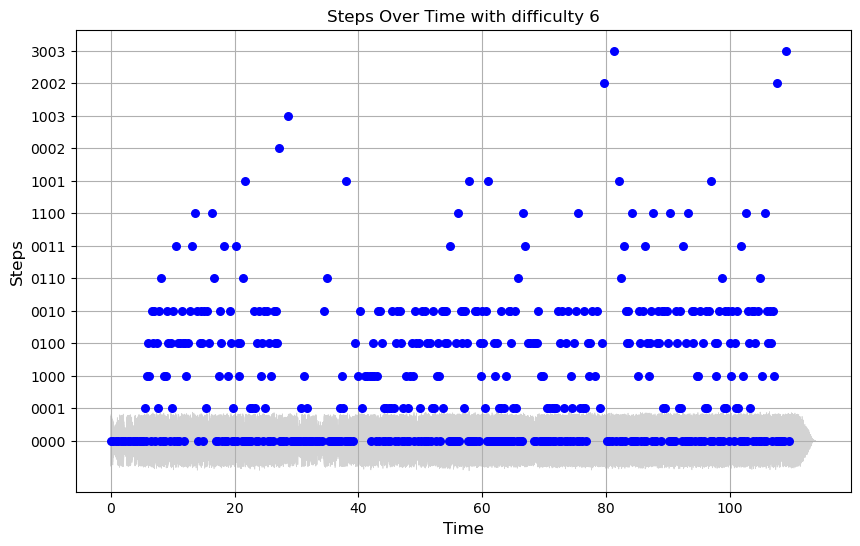

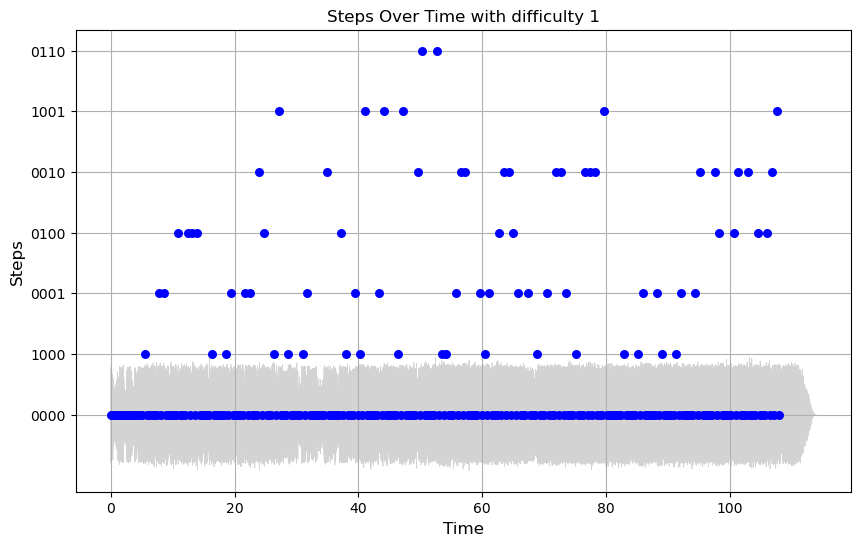

In [3]:
for chart in data['charts']:
    if chart['type'] != 'dance-single':
        continue
    # Extract time and step values from the JSON data
    time_values = [entry[0] for entry in chart['notes']]
    step_values = [entry[1] for entry in chart['notes']]

    # Convert the time values to float and step values to string
    time_values = list(map(float, time_values))
    step_values = list(map(str, step_values))
    
    audio_data, sample_rate = sf.read(data['music_fp'])
    
    # Create a time axis for the audio waveform
    audio_duration = len(audio_data) / sample_rate
    audio_time = np.linspace(0, audio_duration, len(audio_data))

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the audio waveform as the background
    ax.plot(audio_time, audio_data, color='lightgray', linewidth=0.5, zorder=1)

    # Plot the steps over time
    ax.scatter(time_values, step_values, color='blue', marker='o', s=30, zorder=2)

    ax.set_xlabel('Time', fontsize=12)
    ax.set_ylabel('Steps', fontsize=12)
    # set y axis to have all unique steps
    # ax.set_yticks(list(unique_steps))
    ax.set_yticks(list(sorted(set(step_values), key=custom_sort_key)))
    ax.set_title('Steps Over Time with difficulty {}'.format(chart['difficulty_fine']))
    ax.grid(True)

    plt.show()